In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2.Load The Dataset

In [30]:
abalone_data = pd.read_csv("abalone.csv")

In [31]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone_data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

3.Perform Visualizations.

Univariate analysis

<AxesSubplot:xlabel='Rings'>

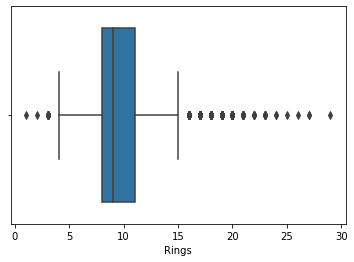

In [5]:
sns.boxplot(data=abalone_data, x="Rings")


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

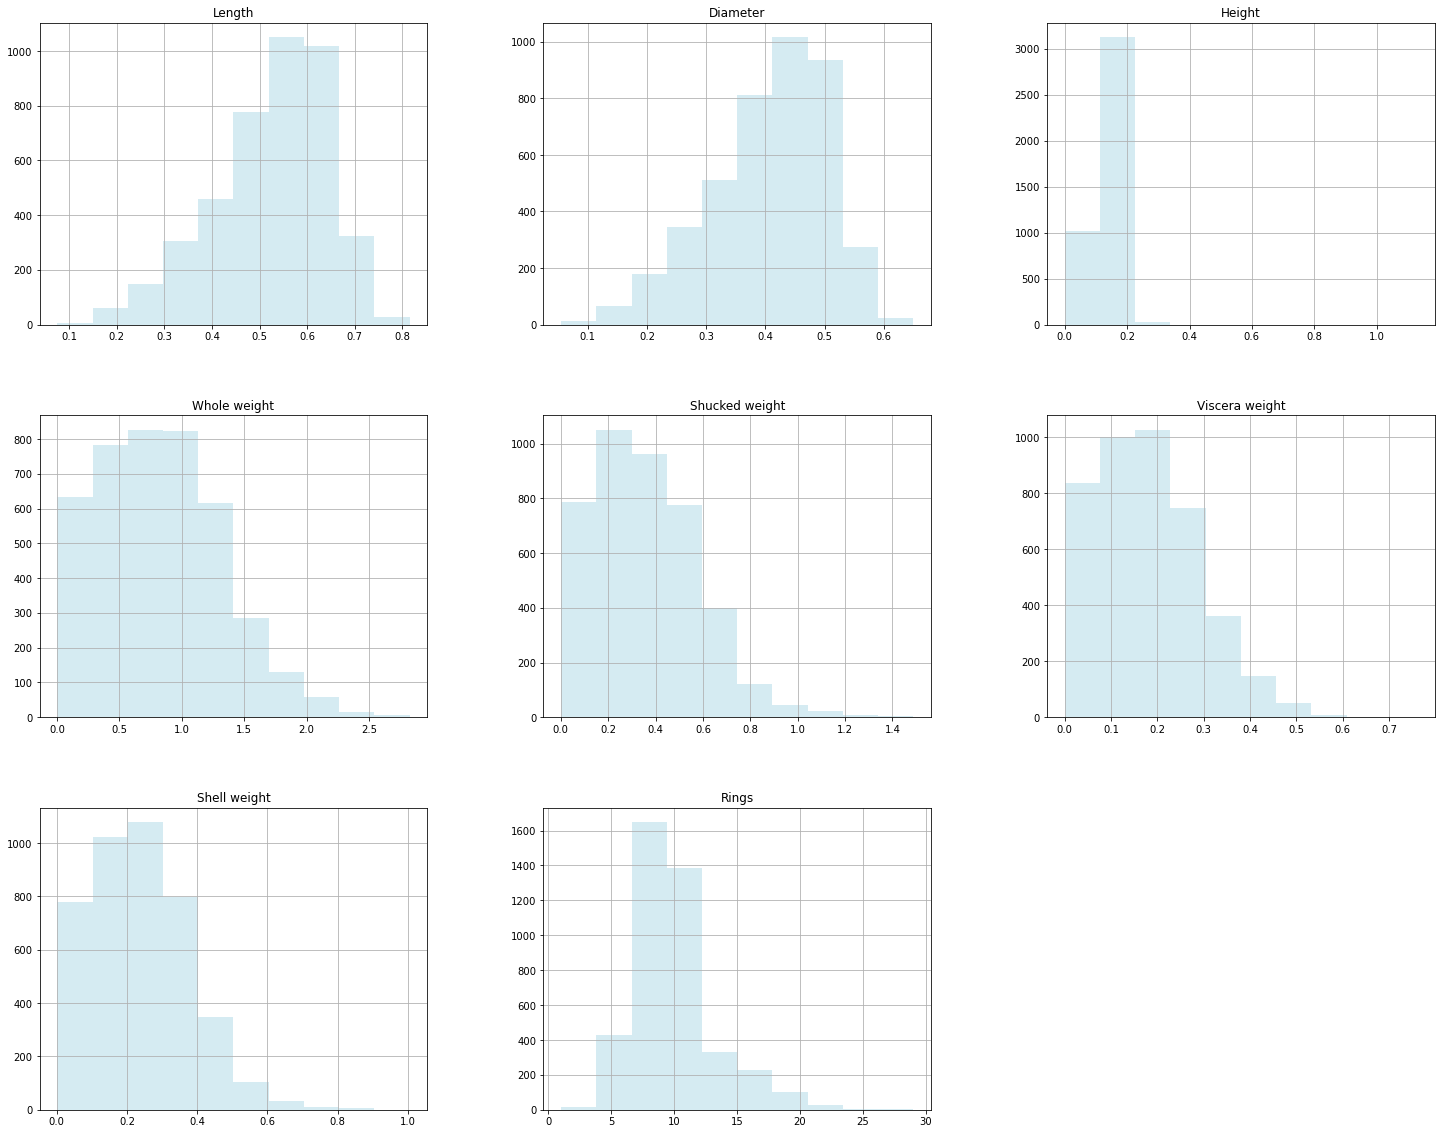

In [6]:
abalone_data.hist(figsize=(25,20), grid=True, alpha=0.5, color='lightblue')

Bivariate Analysis

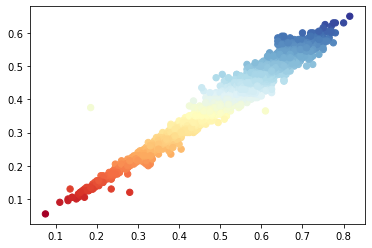

In [7]:
plt.scatter(abalone_data["Length"],abalone_data["Diameter"], c=abalone_data['Diameter'], s=40, cmap=plt.cm.RdYlBu)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Rings'>

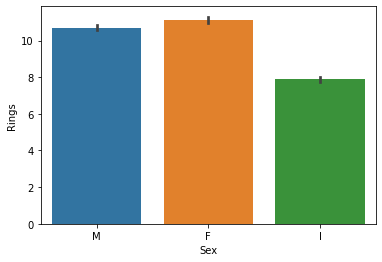

In [8]:
sns.barplot(abalone_data["Sex"], abalone_data["Rings"])

Multivariate Analysis

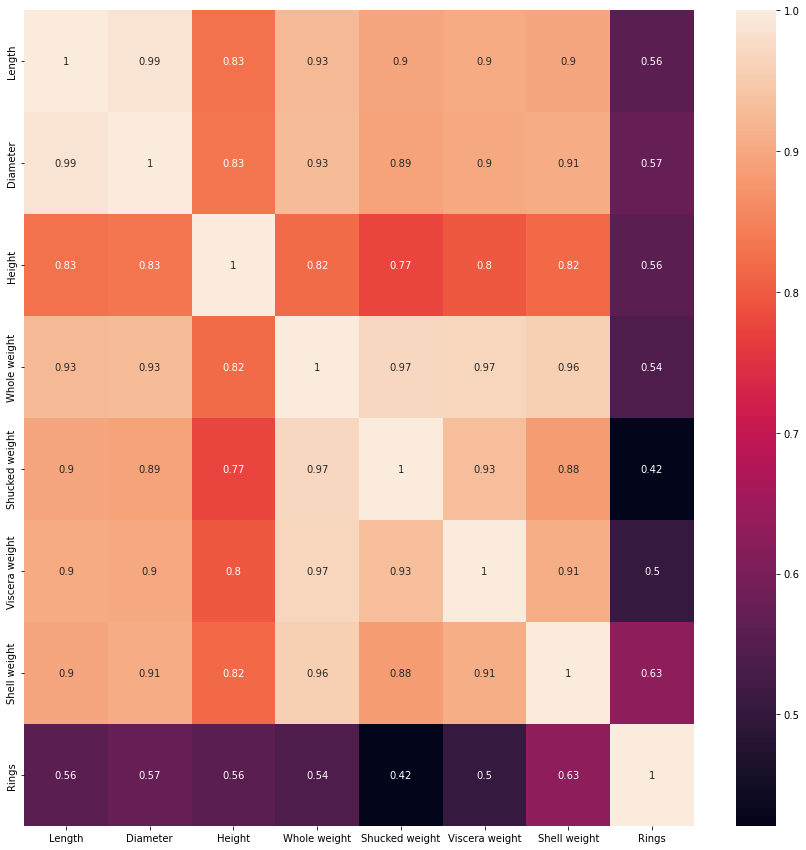

In [9]:
plt.figure(figsize = (15, 15))
corr = abalone_data.corr()
_= sns.heatmap(corr, annot = True)

In [10]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


5. check for missing values and deal with them.

In [11]:
abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

6. Finding outliers ans replace them with outliers.

<AxesSubplot:>

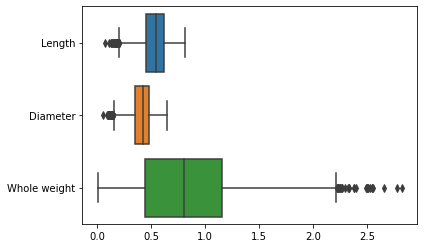

In [12]:
sns.boxplot(data=abalone_data[["Length", "Diameter","Whole weight"]], orient="h")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shucked weight'>

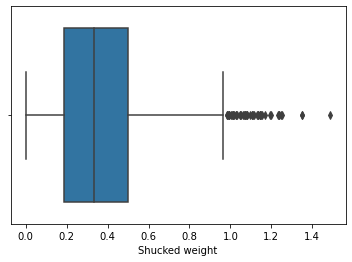

In [13]:
sns.boxplot(abalone_data["Shucked weight"])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Viscera weight'>

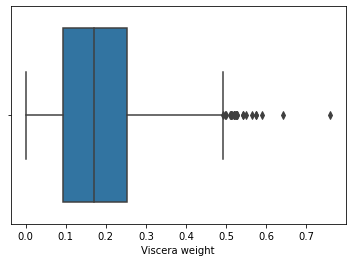

In [14]:
sns.boxplot(abalone_data["Viscera weight"])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shell weight'>

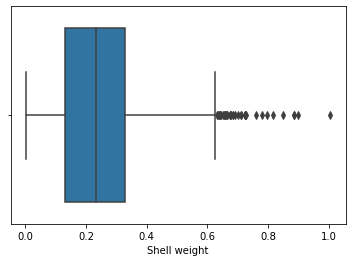

In [15]:
sns.boxplot(abalone_data["Shell weight"])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rings'>

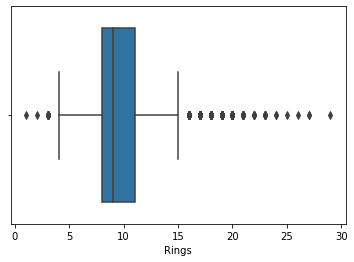

In [16]:
sns.boxplot(abalone_data["Rings"])

In [17]:
cols = ["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]

for i in cols:
    q1=abalone_data[i].quantile(0.25)
    q3=abalone_data[i].quantile(0.75)
    IQR=q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1- 1.5 * IQR
    abalone_data=abalone_data[abalone_data[i] < upper_limit]

<AxesSubplot:>

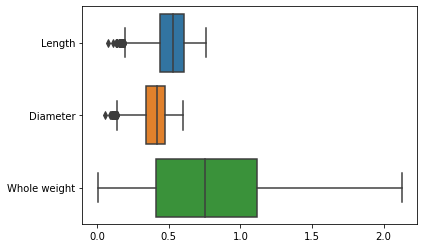

In [18]:
sns.boxplot(data=abalone_data[["Length", "Diameter","Whole weight"]], orient="h")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rings'>

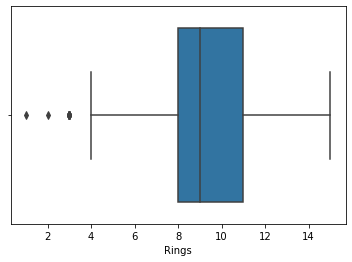

In [19]:
sns.boxplot(abalone_data["Rings"])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shell weight'>

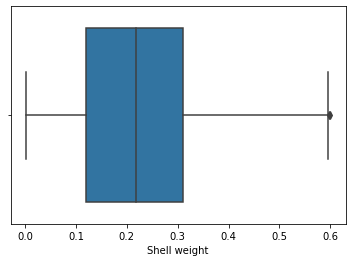

In [20]:
sns.boxplot(abalone_data["Shell weight"])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shucked weight'>

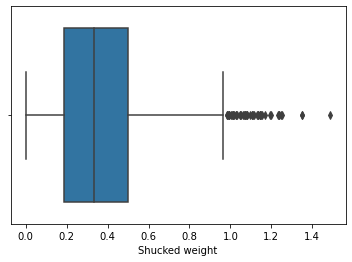

In [32]:
sns.boxplot(abalone_data["Shucked weight"])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Viscera weight'>

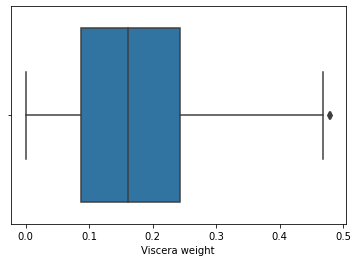

In [22]:
sns.boxplot(abalone_data["Viscera weight"])

7. Check for categorical columns and perform encoding.

In [23]:
from sklearn.preprocessing import LabelEncoder

In [36]:
label_encoding = LabelEncoder()
abalone_data["Sex"] = label_encoding.fit_transform(abalone_data["Sex"])
abalone_data["Sex"].unique()

array([2, 0, 1], dtype=int64)

8. Split the data into dependent and independent variables.

In [37]:
y = abalone_data['Rings']
abalone_data = abalone_data.drop(['Rings'], axis = 1)
x = abalone_data

# getting the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (4177, 8)
Shape of y: (4177,)


9. Scale the independent variables.

In [38]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x=std.fit_transform(x)

10. Split the data into training and testing

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3341, 8)
Shape of x_test : (836, 8)
Shape of y_train : (3341,)
Shape of y_test : (836,)


11. Build the Model

In [48]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

12. Train the Model

In [42]:
train_pred = model.predict(x_train)
train_pred

array([ 4,  5, 11, ...,  9, 10,  7], dtype=int64)

13. Test the Model

In [43]:
pred= model.predict(x_test)
pred

array([15,  9, 10,  5, 10, 10,  8,  8,  8, 10,  8,  6,  8,  9,  5,  9,  7,
       13, 10,  8,  7,  6,  8,  6,  9, 10,  4, 11,  9, 10,  7,  4, 10, 11,
        8,  8,  8,  9,  8, 11, 10,  8, 10, 10, 10,  8,  9, 10, 10,  7, 10,
        7,  8, 13,  9,  8,  6,  7,  7,  7,  9,  9, 10,  8,  7, 11, 11, 10,
        9, 11,  8, 18, 10,  9,  9,  9,  9,  9, 10,  8,  9,  6,  8, 10,  9,
        8,  9, 11,  4,  7,  9, 10,  8,  7, 10,  6,  9,  7, 13, 11, 10, 10,
        9,  9,  5, 10,  8,  6,  7, 10, 11, 11, 10,  8, 15, 11, 10, 10,  5,
        8,  7, 10,  7,  8, 10, 11, 10, 11,  7, 10, 10,  8,  8, 11, 11, 10,
        9,  8,  7, 11, 10, 10,  7,  9, 10,  9,  8,  8,  8,  6,  8, 13,  7,
       10,  7,  7, 10,  7, 10,  6, 10,  7,  9, 10,  5, 10,  8,  6, 10,  9,
        8,  4,  8,  9, 11,  9,  5,  8,  7, 10,  8,  9,  9,  9, 10,  9,  9,
        8,  6,  8,  9,  8,  9,  9, 10,  8,  7,  9,  4, 11,  8, 10, 11,  9,
        9, 11,  6, 11,  9, 13,  5,  9, 10,  9, 10,  9,  9, 10,  5, 11, 10,
       10,  8,  9, 10, 13

14. Measure the performance using Metrics.

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,pred)

0.2679425837320574

In [47]:
accuracy_score(y_train,train_pred)

0.27985633043998803